# Final Project CS319
* Name: Ido Haber
* Student ID: 9078590024

_Here we will analyze the electrical activity of neuronal cultures that were plated on a glass coverslip with 60 electrodes embedded in them._

<img src="regular.jpg" width= "350" height="200" align="left"/> <img src="zoomed.jpg" width= "350" height="270" align="center"/>

As you can see in the pictures: there are hundreds (if not more) neurons per electrode. However, each electrode picks up the signal of only nearby somas and neurites. Depending on what part of the neuron is close to the elctrode, the signal could be either positive or negative. Furthermore, the is noise that is being picked up from the environment, so we will try to filter some of it.  

Install package:

In [ ]:
# pip install tdt

  ### Part 0: Housekeeping
  
  1. Importing
  2. How to get help?
  3. Path to docs
  
  ##### Q1: Import the necessary modules

In [1]:
import tdt # import the tdt library. 
           #This is a custom library that is necessary to for working with their hardware & files.
import matplotlib.pyplot as plt  # standard Python plotting library
import numpy as np               # fundamental package for scientific computing, for arrays & maths
import scipy      # adds significant power to the interactive Python session by providing the user with high-level 
                  #commands and classes for manipulating and visualizing data.
import pandas as pd
%matplotlib inline
from matplotlib.ticker import MaxNLocator # so we can force integer tick labels later

#### Q2: How to get help?
Use the __doc__ function to get help on a function.

In [2]:
help(tdt.read_block)

Help on function read_block in module tdt.TDTbin2py:

read_block(block_path, *, bitwise='', channel=0, combine=None, headers=0, nodata=False, ranges=None, store='', t1=0, t2=0, evtype=None, verbose=0, sortname='TankSort', export=None, scale=1, dtype=None, outdir=None, prefix=None, outfile=None)
    TDT tank data extraction.
    
    data = read_block(block_path), where block_path is a string, retrieves
    all data from specified block directory in struct format. This reads
    the binary tank data and requires no Windows-based software.
    
    data.epocs      contains all epoc store data (onsets, offsets, values)
    data.snips      contains all snippet store data (timestamps, channels,
                    and raw data)
    data.streams    contains all continuous data (sampling rate and raw
                    data)
    data.scalars    contains all scalar data (samples and timestamps)
    data.info       contains additional information about the block
    
    optional keyword argum

In [3]:
print(tdt.read_block.__doc__) 

TDT tank data extraction.
    
    data = read_block(block_path), where block_path is a string, retrieves
    all data from specified block directory in struct format. This reads
    the binary tank data and requires no Windows-based software.

    data.epocs      contains all epoc store data (onsets, offsets, values)
    data.snips      contains all snippet store data (timestamps, channels,
                    and raw data)
    data.streams    contains all continuous data (sampling rate and raw
                    data)
    data.scalars    contains all scalar data (samples and timestamps)
    data.info       contains additional information about the block
    
    optional keyword arguments:
        t1          scalar, retrieve data starting at t1 (default = 0 for
                        beginning of recording)
        t2          scalar, retrieve data ending at t2 (default = 0 for end
                        of recording)
        sortname    string, specify sort ID to use when extrac

In [ ]:
print(tdt.epoc_filter.__doc__)

In [ ]:
print(tdt.read_sev.__doc__)

#### Q3: Set path to docs

In [4]:
BLOCK_PATH = '/Users/idohaber/Desktop/Haber/data/Algernon-180308-130351'
#/Users/idohaber/Desktop/Haber/data/Algernon-180308-130351

In [ ]:
heads = read_block(block_path, headers=1)

### Part 1: read_block returns a structured object
It is a Python dictionary but also allows you to use the dot syntax like in Matlab<br> 
__so you can access fields within the structure with either method.__<br>
These two ways of looking at the block info field are equivalent:

In [5]:
data_0 = tdt.read_block(BLOCK_PATH) #this may take a few seconds depending on the length of recording.
print(data_0) 

read from t=0s to t=61.23s
epocs	[struct]
snips	[struct]
streams	[struct]
scalars	[struct]
info	[struct]
time_ranges:	array([[ 0.],
       [inf]])


#### Q4: Look at the block via the two different methods:

In [6]:
data_0.info#option1

tankpath:	'/Users/idohaber/Desktop/Haber/data'
blockname:	'Algernon-180308-130351'
start_date:	datetime.datetime(2018, 3, 8, 12, 3, 53, 999999)
utc_start_time:	'12:03:53'
stop_date:	datetime.datetime(2018, 3, 8, 12, 4, 55, 233578)
utc_stop_time:	'12:04:55'
duration:	datetime.timedelta(seconds=61, microseconds=233579)
stream_channel:	0
snip_channel:	0

In [ ]:
data_0["info"] #option2

In [ ]:
data_0.head()

### Part 2a: Accessing Elements
We need to records the voltage with a high sampliong rate because action potentials happen on the ms scale.
#### Q5: access the 'Wav1' store sampling rate via different methods

In [7]:
data_0.streams.Wav1.fs # dot syntax

24414.0625

In [8]:
data_0['streams']['Wav1']['fs'] # dict keys only

24414.0625

In [ ]:
data_0['streams'].Wav1['fs'] # mix of dot syntax and dict keys

Accessing a field with the string dictionary key method is useful when using a variable name, 
such as this example which loops through all the stream store names and prints their sampling rates.

In [9]:
print('Sampling rates in', data_0.info.blockname)
for store in data_0.streams.keys():
    print(store, '{:.4f} Hz'.format(data_0.streams[store].fs))

Sampling rates in Algernon-180308-130351
LFP1 3051.7578 Hz
pNe1 498.2462 Hz
Wav1 24414.0625 Hz


### Part 3: Exploring Stream Events

Let's look at the contents of the stream event structures.

In [10]:
print('all stream stores')
print(data_0.streams)

all stream stores
LFP1	[struct]
pNe1	[struct]
Wav1	[struct]


In [11]:
print(data_0.streams.Wav1)

name:	'Wav1'
code:	829841751
size:	2058
type:	33025
type_str:	'streams'
ucf:	False
fs:	24414.0625
dform:	0
start_time:	0.0
data:	array([[ 1.0028159e-03,  1.0012799e-03,  9.9590386e-04, ...,
        -1.5983999e-03, -1.5984639e-03, -1.5852799e-03],
       [ 5.5667193e-04,  5.6723197e-04,  5.6083198e-04, ...,
        -1.4531199e-03, -1.4584319e-03, -1.4480639e-03],
       [-4.6534397e-04, -4.5804796e-04, -4.6521597e-04, ...,
        -1.2184319e-03, -1.2098559e-03, -1.2177919e-03],
       ...,
       [ 2.9247998e-05,  2.3295999e-05,  3.2191998e-05, ...,
        -2.2208637e-03, -2.2241918e-03, -2.2300798e-03],
       [ 7.2191993e-04,  7.1571197e-04,  7.2358397e-04, ...,
        -2.1401597e-03, -2.1399679e-03, -2.1494399e-03],
       [ 2.3078399e-04,  2.3590398e-04,  2.4435198e-04, ...,
        -1.3180159e-03, -1.3103359e-03, -1.3012479e-03]], dtype=float32)
channel:	[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]


The actual data is store in numpy arrays.  For a multi-channel stream store, each row is a channel. 
Python uses 0-based indexing, so we have to subtract 1 from our channel number when accessing the array

#### Q6: Look at the structure of channel 1

In [12]:
print('channel 1:', data_0.streams.Wav1.data[0])

channel 1: [ 0.00100282  0.00100128  0.0009959  ... -0.0015984  -0.00159846
 -0.00158528]


#### Q7: How many channels were recorded?

In [13]:
print('number of channels:', len(data_0.streams.Wav1.data))

number of channels: 16


#### Q8: how many samples are in a single channel? 

In [14]:
num_samples = len(data_0.streams.Wav1.data[0])
print('number of samples:', num_samples)

number of samples: 1490944


#### Q9: Create time vector for plotting by dividing the number of samples in the array by the sampling rate

In [15]:
Wav1_time = np.linspace(1, num_samples, num_samples) / data_0.streams.Wav1.fs
Wav1_time

array([4.09600000e-05, 8.19200000e-05, 1.22880000e-04, ...,
       6.10689843e+01, 6.10690253e+01, 6.10690662e+01])

### Part4: Plotting
#### Q10: Plot the first 2 seconds from a single channel

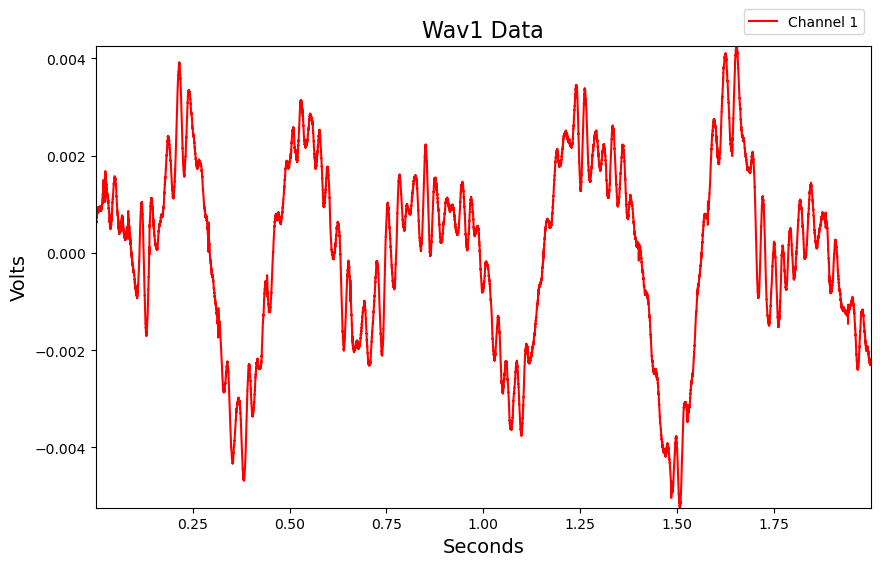

In [18]:
t = int(2 *data_0.streams.Wav1.fs) # int rounds it to the nearest integer

fig1 = plt.subplots(figsize=(10, 6)) # set figure size

channel = 1

# plot the line using slices
plt.plot(Wav1_time[0:t], data_0.streams.Wav1.data[channel,0:t], color='r')

# create title, axis labels, and legend
plt.title('Wav1 Data', fontsize=16)
plt.xlabel('Seconds', fontsize=14)
plt.ylabel('Volts', fontsize=14)
plt.legend(('Channel {}'.format(channel),),
           loc='lower right', 
           bbox_to_anchor=(1.0,1.01)
          )
plt.autoscale(tight=True)

## Explore Epoc Events

### only works with pule info

Let's look at the contents of the epoc event structures.

In [19]:
print('all epoc events:')
print(data_0.epocs)

all epoc events:
PC0_	[struct]
Pu1e	[struct]


In [20]:
print(data_0.epocs.Pu1e)

name:	'Pu1e'
onset:	array([1.22880000e-04, 3.50011392e+00, 7.00010496e+00, 1.05000960e+01,
       1.40000870e+01, 1.75000781e+01, 2.10000691e+01, 2.45000602e+01,
       2.80000512e+01, 3.15000422e+01, 3.50000333e+01, 3.85000243e+01,
       4.20000154e+01, 4.55000064e+01, 4.89999974e+01, 5.24999885e+01,
       5.59999795e+01, 5.94999706e+01])
offset:	array([ 0.30011392,  3.80010496,  7.300096  , 10.80008704, 14.30007808,
       17.80006912, 21.30006016, 24.8000512 , 28.30004224, 31.80003328,
       35.30002432, 38.80001536, 42.3000064 , 45.79999744, 49.29998848,
       52.79997952, 56.29997056, 59.7999616 ])
type:	'onset'
type_str:	'epocs'
data:	array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18.])
dform:	4
size:	10


In [ ]:
print(data_0.epocs.PC0_)

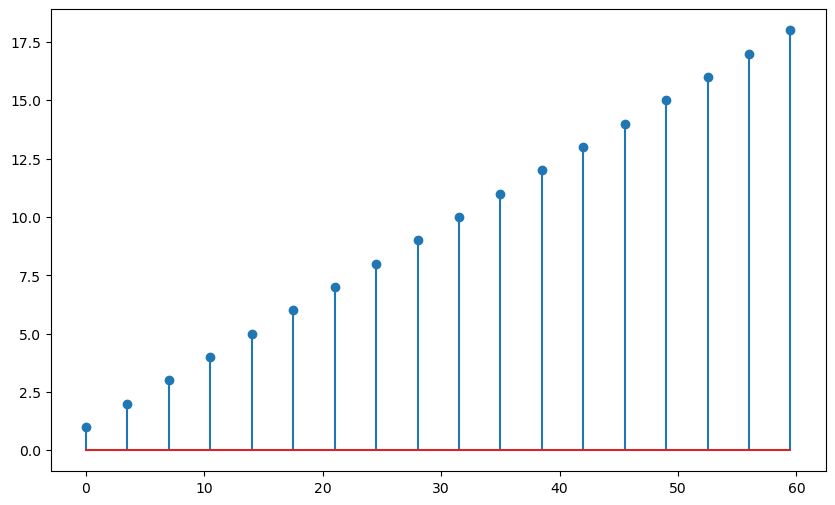

In [21]:
fig1 = plt.subplots(figsize=(10, 6))
plt.stem(data_0.epocs.Pu1e.onset, data_0.epocs.Pu1e.data)
plt.show()

In [22]:
data_1 = tdt.read_block(BLOCK_PATH, evtype=['streams', 'epocs'], channel=[1])

read from t=0s to t=61.23s


#### Q11: create time vectors for each stream store for plotting in time.

In [23]:
time_Wav1 = np.linspace(1, len(data_1.streams.Wav1.data), len(data_1.streams.Wav1.data)) / data_1.streams.Wav1.fs
time_LFP1 = np.linspace(1, len(data_1.streams.LFP1.data), len(data_1.streams.LFP1.data)) / data_1.streams.LFP1.fs
time_pNe1 = np.linspace(1, len(data_1.streams.pNe1.data), len(data_1.streams.pNe1.data)) / data_1.streams.pNe1.fs

## check wav and LFP data @@@@@@@@@@@@@@

#### Q12: Plot 30 seconds of data from each store

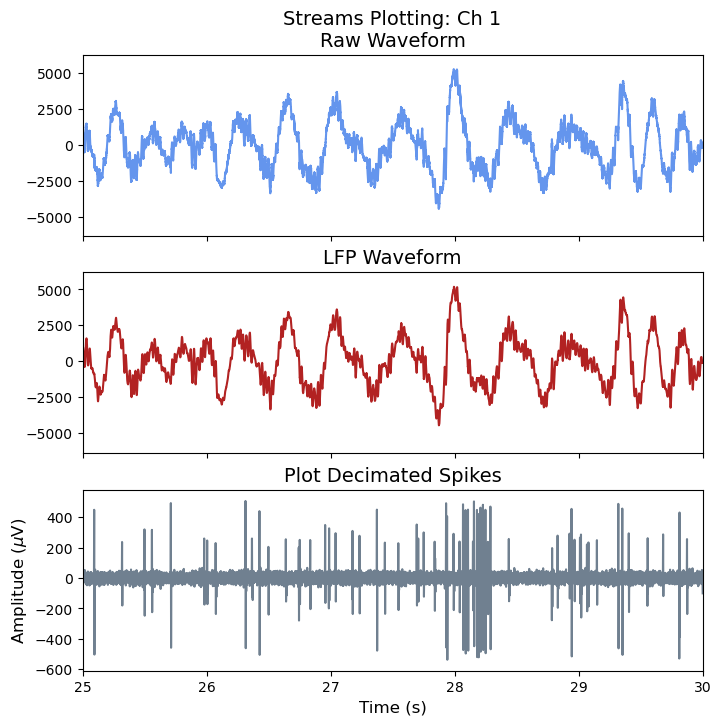

In [24]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, figsize=(8, 8), sharex=True)

ax1.plot(time_Wav1, data_1.streams.Wav1.data*1e6, color='cornflowerblue')
ax1.set_title('Streams Plotting: Ch 1\nRaw Waveform', fontsize=14)

ax2.plot(time_LFP1, data_1.streams.LFP1.data*1e6, color='firebrick')
ax2.set_title('LFP Waveform', fontsize=14)

ax3.plot(time_pNe1, data_1.streams.pNe1.data, color='slategray')
ax3.set_title('Plot Decimated Spikes', fontsize=14)

ax3.set_xlabel('Time (s)', fontsize=12)
ax3.set_ylabel('Amplitude ($\mu$V)', fontsize=12)

ax1.set_xlim(25, 30)

plt.show()

#### Q13: Generate continuous time series for epoc data using epoc timestamps

In [25]:
STIM_SYNC = 'PC0_' # StimSync epoc event
pc0_on = data_0.epocs[STIM_SYNC].onset
pc0_off = data_0.epocs[STIM_SYNC].offset
pc0_x = np.reshape(np.kron([pc0_on, pc0_off], np.array([[1], [1]])).T, [1,
-1])[0]

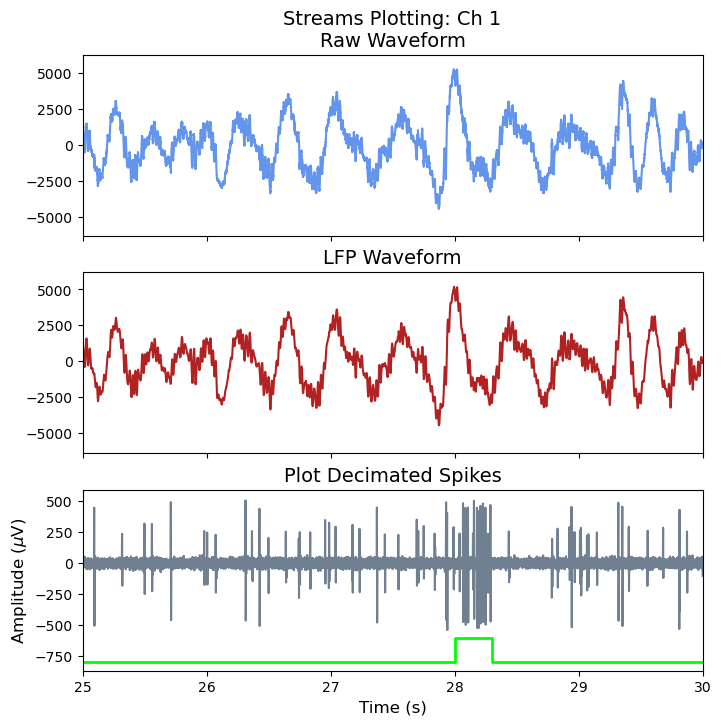

In [26]:
sz = len(pc0_on)
d = data_1.epocs[STIM_SYNC].data
pc0_y = np.reshape(np.vstack([np.zeros(sz), d, d, np.zeros(sz)]).T, [1,-1])[0]
ax3.plot(pc0_x, 200*(pc0_y) - 800, color='lime', linewidth=2)
fig

#### Q14: Set up the varibles for the data you want to extract. 
We will extract channel 1 from the eNe1 snippet data store, created by the PCA Sorting gizmo, and use our PulseGen epoc event PC0/ as our stimulus onset.

In [27]:
REF_EPOC = 'PC0/'
SNIP_STORE = 'eNe1'
SORTID = 'TankSort'
numchannels = 60
CHANNEL = 1
THRESH = -30e-6
NPTS = 30
OVERLAP = 1; # set to 1 to allow double crossings within same window to count as a different snippet
rec_length = 60; # How much time (seconds) to sample for (15 minutes usually)
SORTCODE = 0      # set to 0 to use all sorts
TRANGE = [-0.3, 0.8]

In [28]:
data_3 = tdt.read_block(BLOCK_PATH, evtype=['epocs', 'snips', 'scalars'], sortname=SORTID, channel=CHANNEL, nodata=1)

read from t=0s to t=61.23s


#### Q15: Use epoc_filter to extract data around our epoc event

Using the `t` parameter extracts data only from the time range around our epoc event.

In [29]:
raster_data = tdt.epoc_filter(data_3, REF_EPOC, t=TRANGE)

Adding the `tref` flag makes all of the timestamps relative to the epoc event, which is ideal for generating histograms.

In [30]:
hist_data = tdt.epoc_filter(data_3, REF_EPOC, t=TRANGE, tref=1)

#### Q16: Find matching timestamps for our selected sort code (unit). 

In [31]:
ts = raster_data.snips[SNIP_STORE].ts
if SORTCODE != 0:
    i = np.where(raster_data.snips[SNIP_STORE].sortcode == SORTCODE)[0]
    ts = ts[i]
if len(ts) == 0:
    raise Exception('no matching timestamps found')

num_trials = raster_data.time_ranges.shape[1]

#### Q17 - 20: 
17 - Make histogram plot:<br>
18 - make an array of lists containing timestamps for each trial.<br>
19 - Make a raster plot.<br>
20 - Draw a vertical line at t=0.

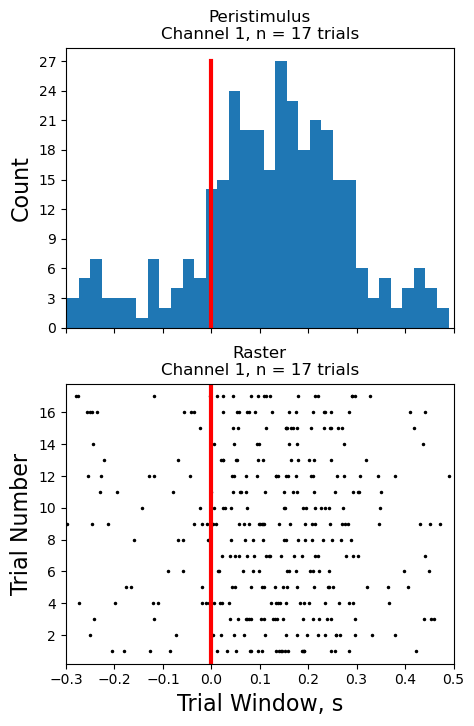

In [32]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(5, 8))

hist_ts = hist_data.snips[SNIP_STORE].ts
nbins = np.int64(np.floor(len(hist_ts)/10.))
hist_n = ax1.hist(hist_ts, nbins)[0]

ax1.axis('tight')
ax1.set_xlim(left=TRANGE[0], right=TRANGE[0]+TRANGE[1])
ax1.set_ylabel('Count',fontsize=16)
ax1.set_title('Peristimulus\nChannel {0}, n = {1} trials'.format(CHANNEL, num_trials))
ax1.yaxis.set_major_locator(MaxNLocator(integer=True))

# Draw a vertical line at t=0.
ax1.plot([0, 0], [0, np.max(hist_n)], 'r-', linewidth=3)

all_ts = [[] for x in range(num_trials)]
all_y = [[] for x in range(num_trials)]
for trial in range(num_trials):
    trial_on = raster_data.time_ranges[0, trial]
    trial_off = raster_data.time_ranges[1, trial]
    ind1 = ts >= trial_on
    ind2 = ts < trial_off
    trial_ts = ts[ind1 & ind2]
    all_ts[trial] = trial_ts - trial_on + TRANGE[0]
    all_y[trial] = (trial+1) * np.ones(len(trial_ts))

all_x = np.concatenate(all_ts)
all_y = np.concatenate(all_y)

ax2.plot(all_x, all_y, 'k.', markersize=3)
ax2.axis('tight')
ax2.set_xlim(left=TRANGE[0], right=TRANGE[0]+TRANGE[1])
ax2.set_xlabel('Trial Window, s',fontsize=16)
ax2.set_ylabel('Trial Number',fontsize=16)
ax2.set_title('Raster\nChannel {0}, n = {1} trials'.format(CHANNEL, num_trials))

ax2.plot([0, 0], [0, trial+2], 'r-', linewidth=3)
ax2.yaxis.set_major_locator(MaxNLocator(integer=True))

plt.show()